In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('Classified Data',index_col = 0)

In [5]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [11]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ..., 
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [13]:
df_scaled = pd.DataFrame(scaled_features,columns = df.columns[:-1])

In [14]:
df_scaled.head(5)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [17]:
from sklearn.cross_validation import train_test_split

In [39]:
X = df_scaled
Y =  df['TARGET CLASS']

In [43]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 101)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
KNN = KNeighborsClassifier(n_neighbors=1)

In [46]:
X_train.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
290,-0.865812,-0.426085,-0.098704,-0.358143,-0.090834,-1.445613,0.943619,-0.711715,-1.416361,1.335201
167,-0.289633,0.427599,-0.324566,-0.291304,-1.047206,-0.847424,0.309935,-2.102427,-1.071680,0.809926
486,-1.628411,0.840546,1.164633,-0.985219,0.346949,-0.064661,1.008390,-0.184080,0.865138,-0.630975
683,-0.576123,-0.157888,0.102529,1.176857,-2.475351,-0.599677,-0.249565,0.262795,0.598726,1.376306
876,0.059207,1.006760,1.932615,2.225987,-0.570004,0.634646,2.427879,1.136821,0.104758,-0.175808


In [47]:
Y_train.head()

290    0
167    1
486    0
683    1
876    0
Name: TARGET CLASS, dtype: int64

In [48]:
KNN.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [52]:
predictions = KNN.predict(X_test)

In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print confusion_matrix(Y_test,predictions)

[[151   8]
 [ 15 126]]


In [54]:
print classification_report(Y_test,predictions)

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       159
          1       0.94      0.89      0.92       141

avg / total       0.92      0.92      0.92       300



In [57]:
error_report = []
for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, Y_train)
    Predict_i = KNN.predict(X_test)
    error_report.append([np.mean(Y_test != Predict_i )])

In [58]:
plt.figure(figsize=(10,6))

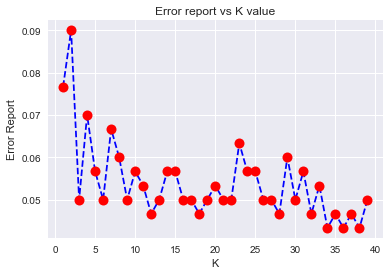

In [59]:
plt.plot(range(1,40),error_report,color='blue',linestyle='dashed', marker='o',markerfacecolor='red',markersize=10)
plt.title('Error report vs K value')
plt.xlabel('K')
plt.ylabel('Error Report')